In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
data=pd.read_csv('StudentsPerformance.csv')

In [8]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
data.shape

(1000, 8)

In [11]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [13]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [15]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [16]:
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [17]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [18]:
student=data.drop(['race/ethnicity','parental level of education'],axis=1)

In [19]:
student

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75
...,...,...,...,...,...,...
995,female,standard,completed,88,99,95
996,male,free/reduced,none,62,55,55
997,female,free/reduced,completed,59,71,65
998,female,standard,completed,68,78,77


In [20]:
corelation=student.corr()

/var/folders/hk/n9zhgl_55rd_zmv9flwps28r0000gn/T/ipykernel_25632/3139700568.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation=student.corr()


<Axes: >

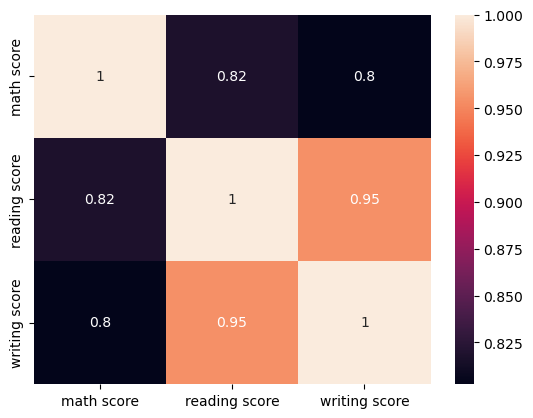

In [21]:
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

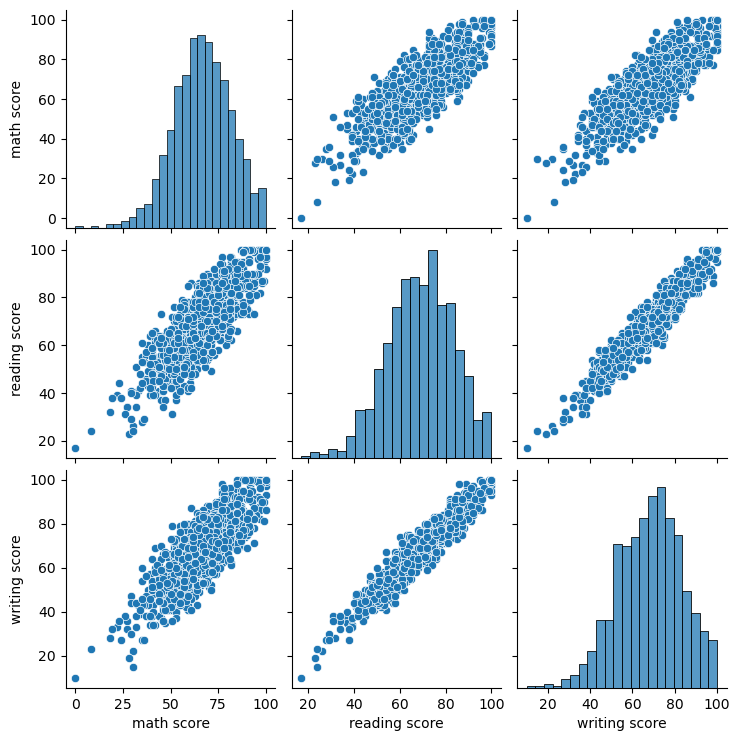

In [22]:
sns.pairplot(student)

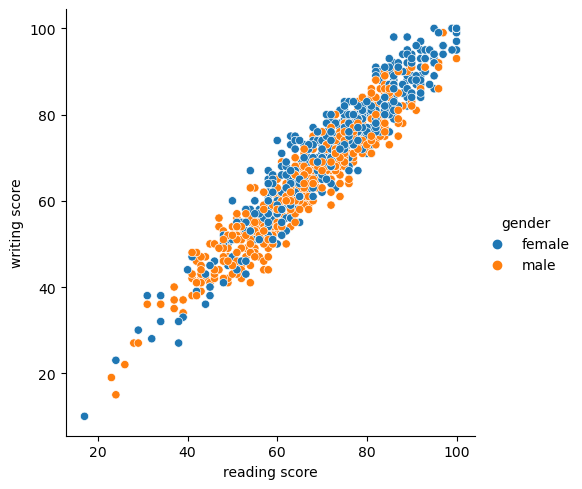

In [23]:
sns.relplot(x='reading score',y='writing score',hue='gender',data=student)

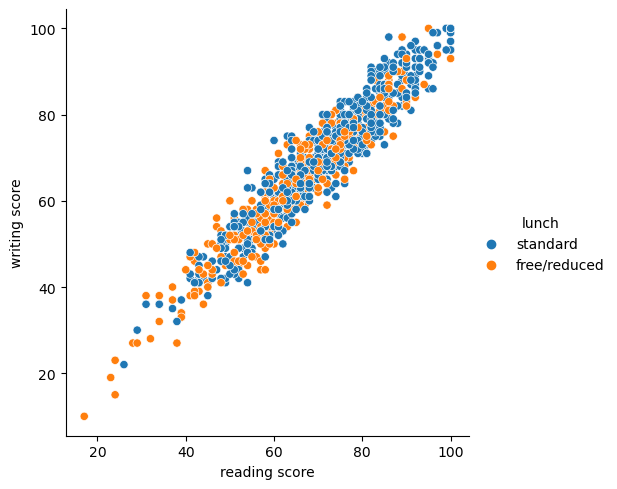

In [24]:
sns.relplot(x='reading score',y='writing score',hue='lunch',data=student)

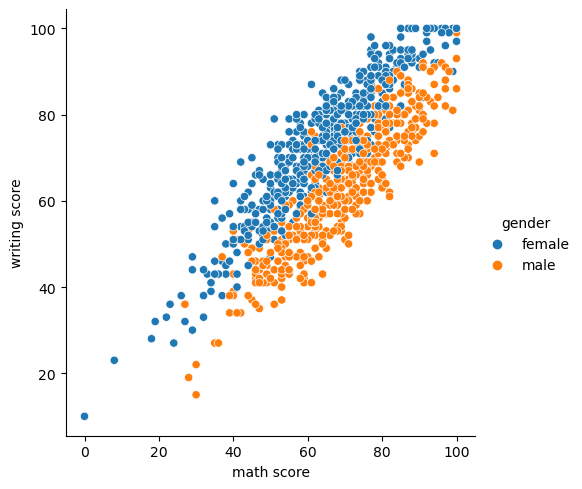

In [25]:
sns.relplot(x='math score',y='writing score',hue='gender',data=student)

<Axes: xlabel='math score', ylabel='Count'>

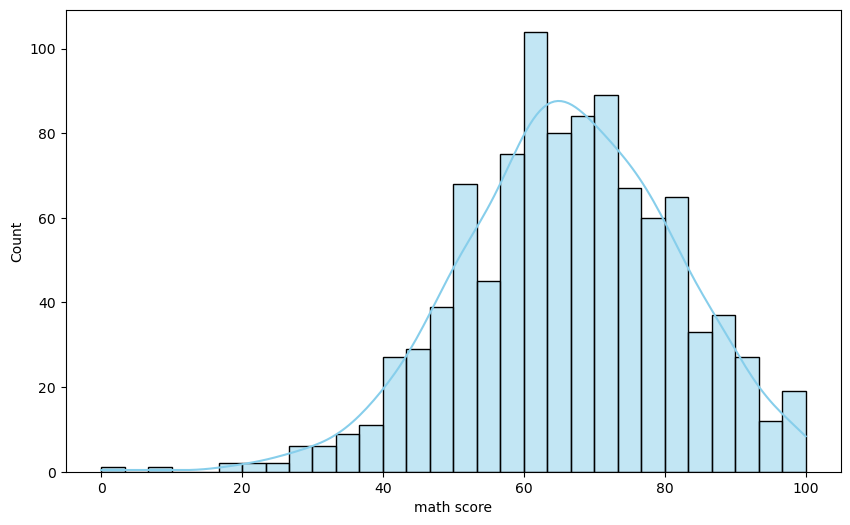

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(student['math score'], kde=True, color='skyblue', bins=30)  # Adjust bins as needed


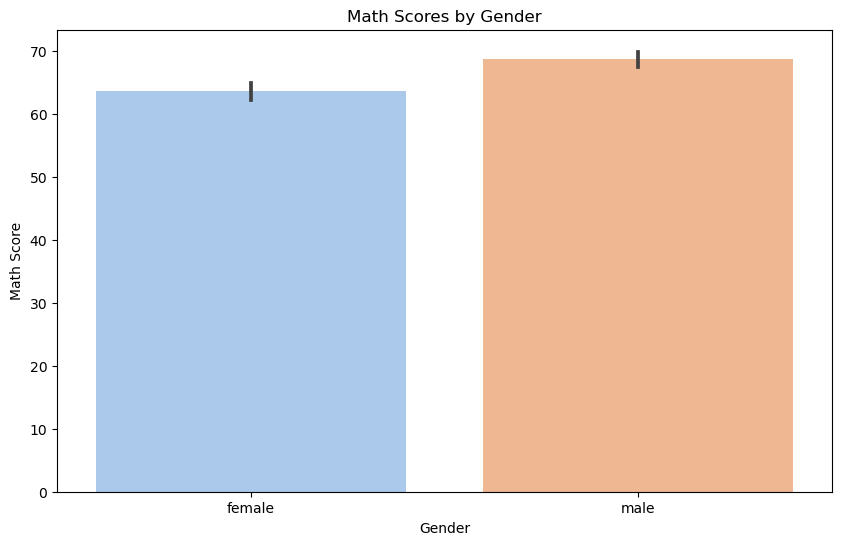

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='math score', data=student, palette='pastel')  # You can choose other palettes

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.title('Math Scores by Gender')

# Show the plot
plt.show()

/var/folders/hk/n9zhgl_55rd_zmv9flwps28r0000gn/T/ipykernel_25632/4095544109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['math score'])


<Axes: xlabel='math score', ylabel='Density'>

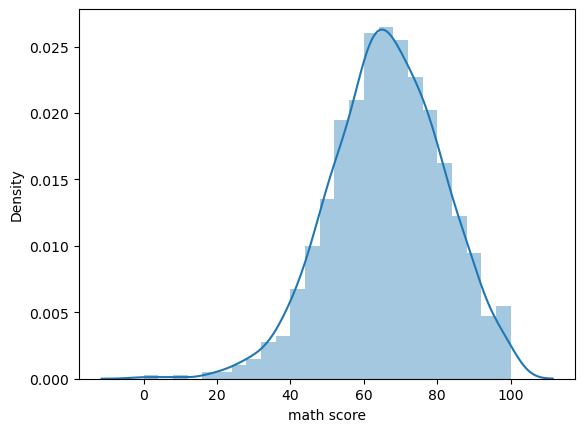

In [28]:
sns.distplot(student['math score'])

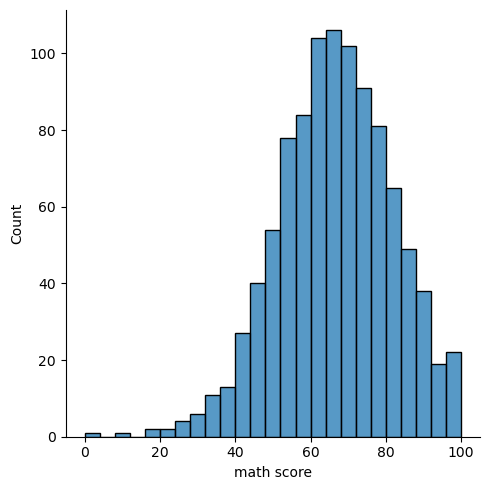

In [29]:
sns.displot(student['math score'])

<Axes: xlabel='math score', ylabel='Count'>

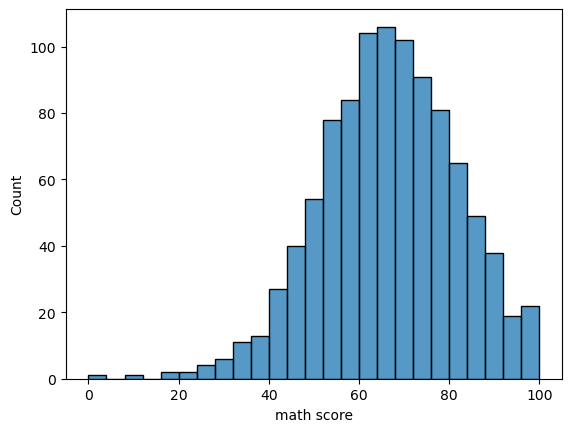

In [30]:
sns.histplot(student['math score'])

/var/folders/hk/n9zhgl_55rd_zmv9flwps28r0000gn/T/ipykernel_25632/585007164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['reading score'],bins=10)


<Axes: xlabel='reading score', ylabel='Density'>

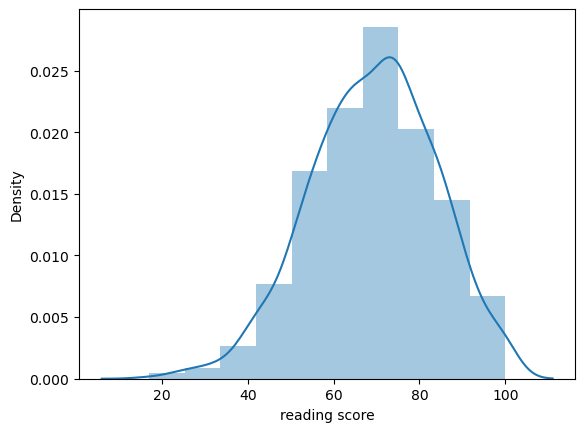

In [31]:
sns.distplot(student['reading score'],bins=10)

/var/folders/hk/n9zhgl_55rd_zmv9flwps28r0000gn/T/ipykernel_25632/2182857048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student['writing score'],bins=5)


<Axes: xlabel='writing score', ylabel='Density'>

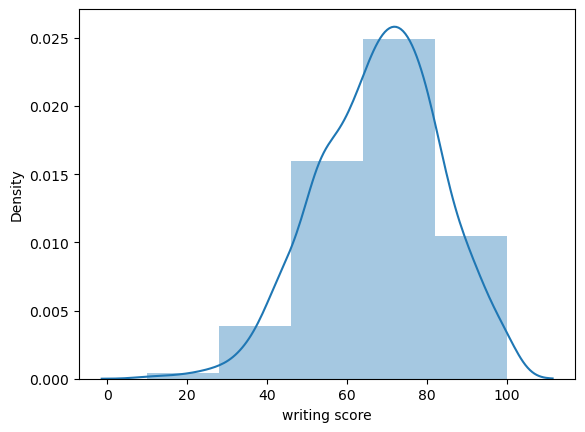

In [32]:
sns.distplot(student['writing score'],bins=5)

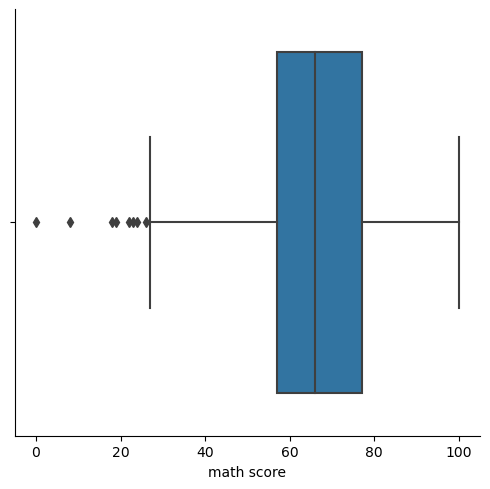

In [33]:
sns.catplot(x='math score',kind='box',data=student)